In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 한글폰트 깨짐 방지
# 이 부분은 실행 툴 따라서 변경해주세요! 현재 주피터 기준입니다
# 윈도우에서는 'Malgun Gothic', 맥에서는 'AppleGothic'
import matplotlib as mlp

mlp.rcParams['font.family'] ='Malgun Gothic'
mlp.rcParams['axes.unicode_minus'] =False

# 1. 파일 Import

In [3]:
# 각자 맡으신 년도 파일 import
data = pd.read_csv("/Users/songa/DM 팀플/final_boarding_data.csv")

# 원본 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804689 entries, 0 to 804688
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   요금           804689 non-null  int64  
 1   승차거리         804689 non-null  float64
 2   대기시간         804689 non-null  float64
 3   공휴일          804689 non-null  int64  
 4   평균기온(°C)     804689 non-null  float64
 5   일강수량(mm)     804689 non-null  float64
 6   안개 계속시간(hr)  804689 non-null  float64
 7   차고지          804689 non-null  int64  
 8   접수시간         804689 non-null  int64  
 9   출발지구_출발지동    804689 non-null  object 
 10  목적지구_목적지동    804689 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 67.5+ MB


In [4]:
data

,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지,접수시간,출발지구_출발지동,목적지구_목적지동
0,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0,4,노원구_중계4동,노원구_하계1동
1,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0,2,서대문구_홍제제1동,서대문구_충현동
2,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1,3,노원구_월계2동,성북구_안암동
3,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1,6,노원구_하계1동,노원구_하계1동
4,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0,4,서대문구_남가좌제2동,마포구_망원제1동
...,...,...,...,...,...,...,...,...,...,...,...
804684,2000,6885.0,62.583333,0,2.1,4.7,1.18,1,20,강서구_방화제2동,양천구_신월2동
804685,1500,1064.0,69.716667,0,2.1,4.7,1.18,0,20,은평구_불광제1동,은평구_대조동
804686,1500,1610.0,47.983333,0,2.1,4.7,1.18,0,21,은평구_대조동,은평구_응암제1동
804687,1500,1745.0,72.166667,0,2.1,4.7,1.18,1,22,노원구_하계1동,노원구_중계1동


# 11. EDA

## 11.2 출발지동, 목적지동별 이용 수 시각화(상위 20개만 출력)

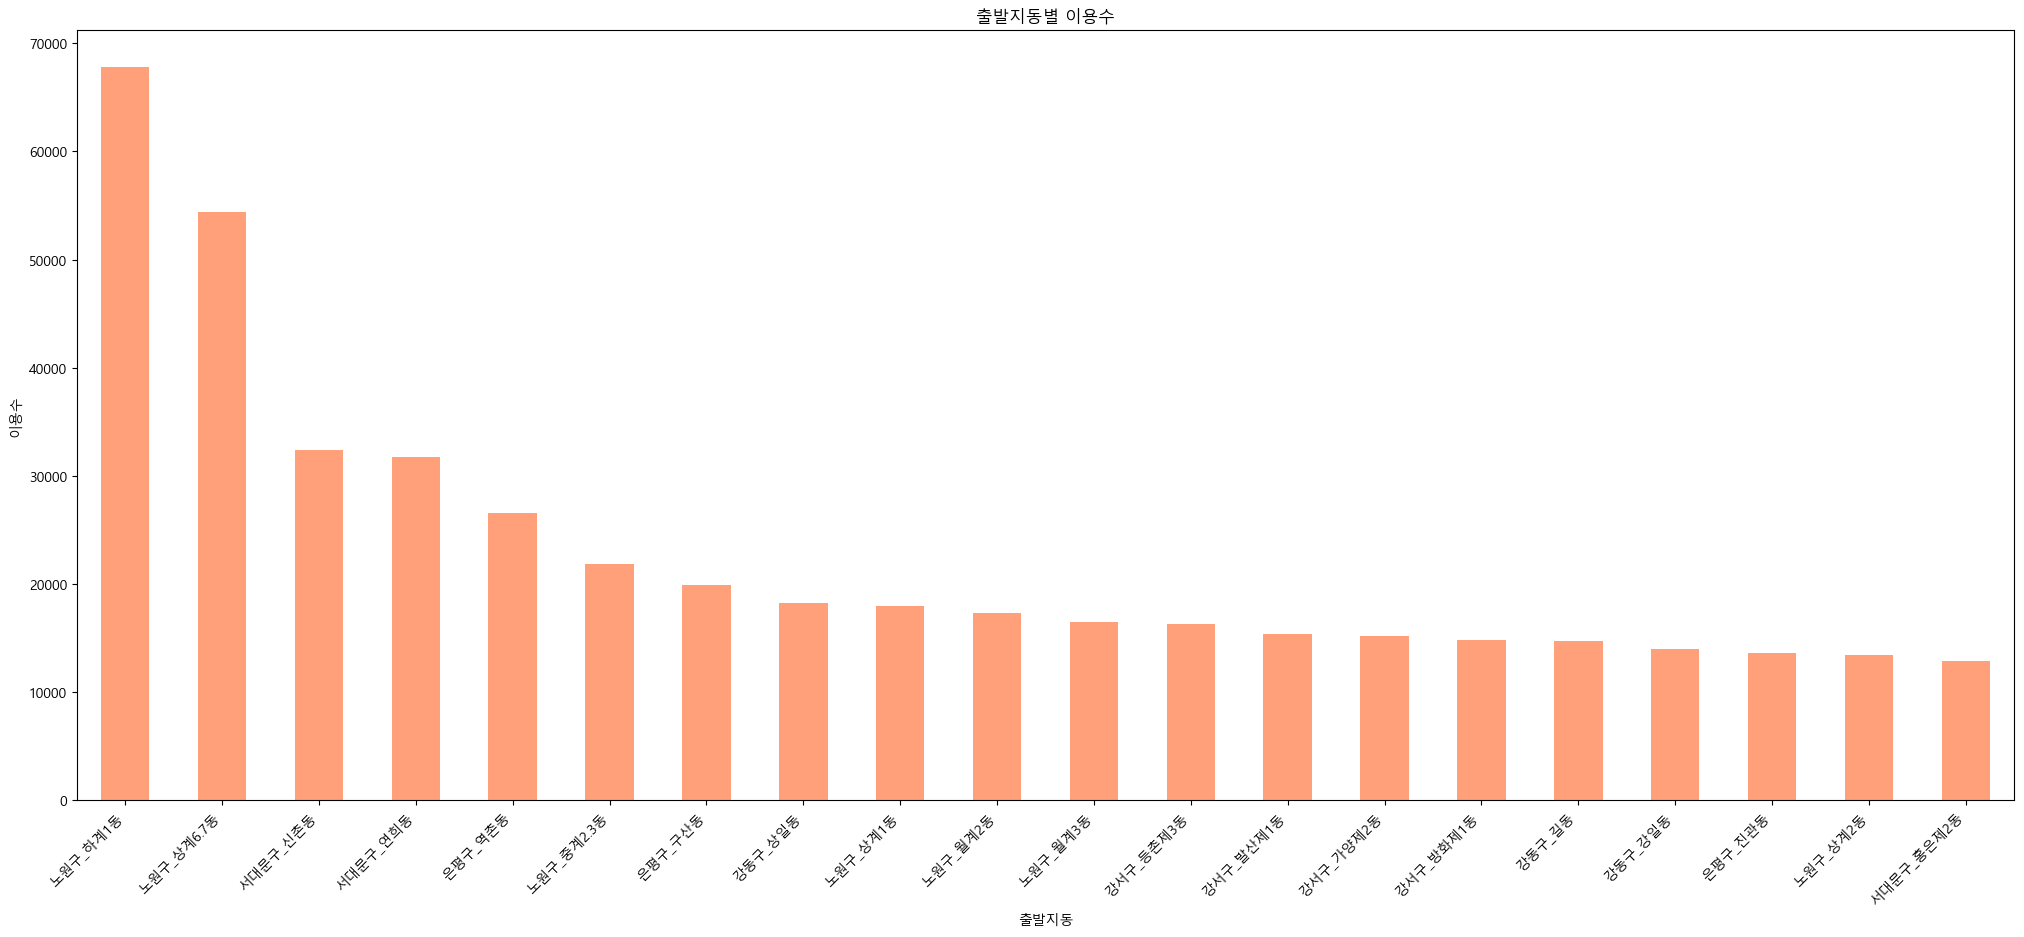

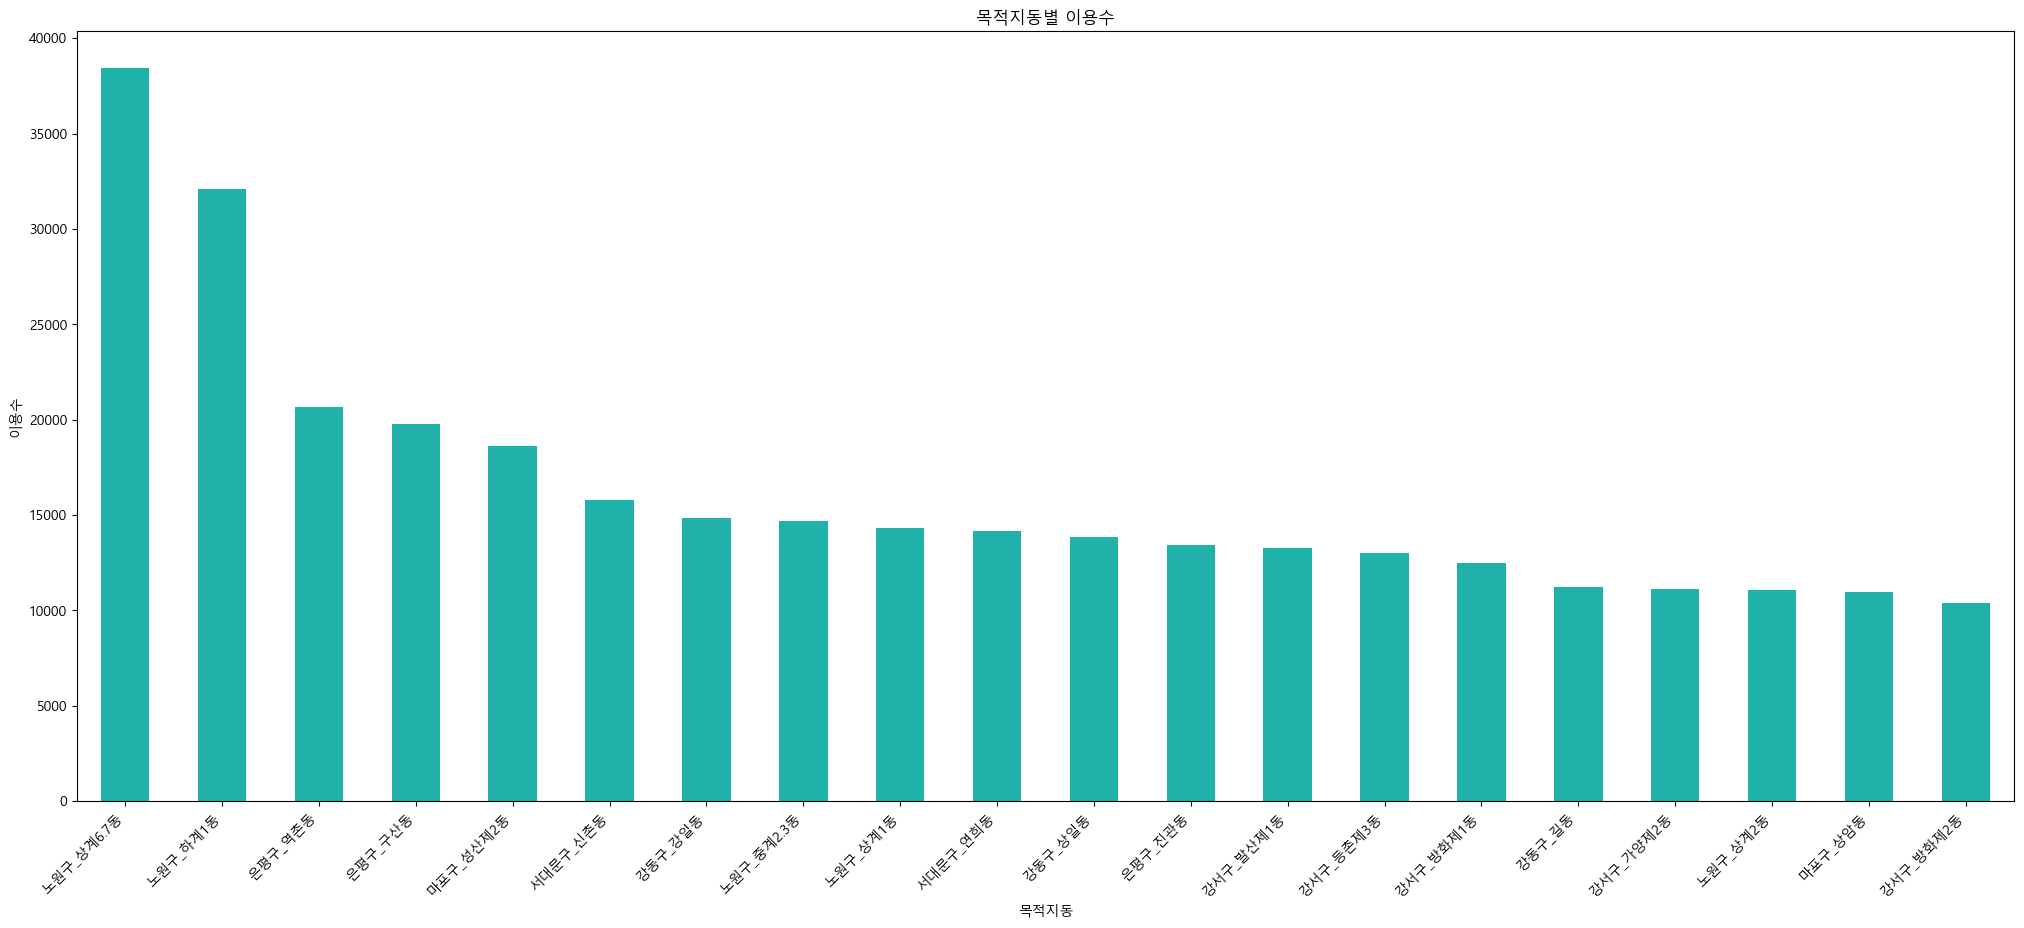

In [5]:
# 출발지동별 이용수 시각화
startdong_type_counts = data['출발지구_출발지동'].value_counts().head(20)
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('출발지동별 이용수')
plt.xlabel('출발지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지동별 이용수 시각화
enddong_type_counts = data['목적지구_목적지동'].value_counts().head(20)
plt.figure(figsize=(25, 10))
enddong_type_counts.plot(kind='bar', color='lightseagreen')
plt.title('목적지동별 이용수')
plt.xlabel('목적지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.4 공휴일 출발지동, 목적지동별 이용수 시각화(상위 20개만 출력)

노원구_하계1동      613
노원구_상계6.7동    604
노원구_중계2.3동    516
강서구_등촌제3동     400
노원구_월계3동      376
Name: 출발지구_출발지동, dtype: int64
노원구_상계6.7동    416
강서구_등촌제3동     324
노원구_하계1동      298
노원구_중계2.3동    295
마포구_성산제2동     234
Name: 목적지구_목적지동, dtype: int64


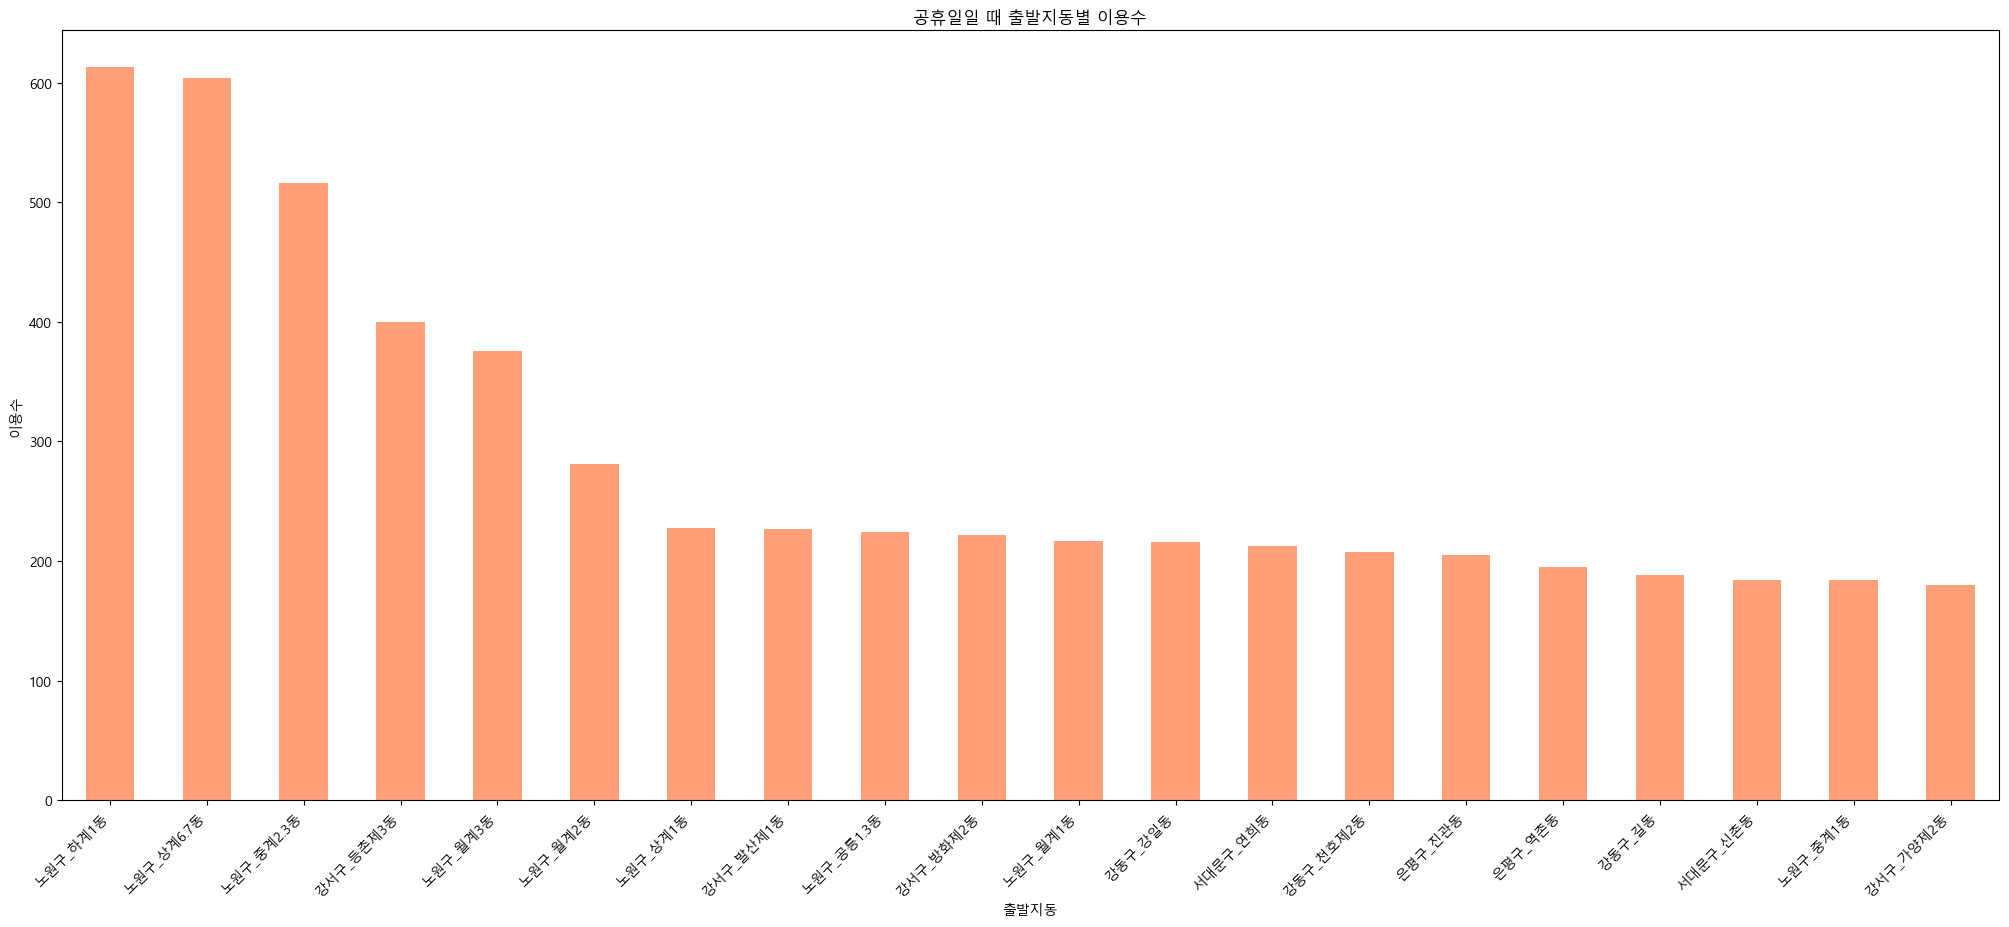

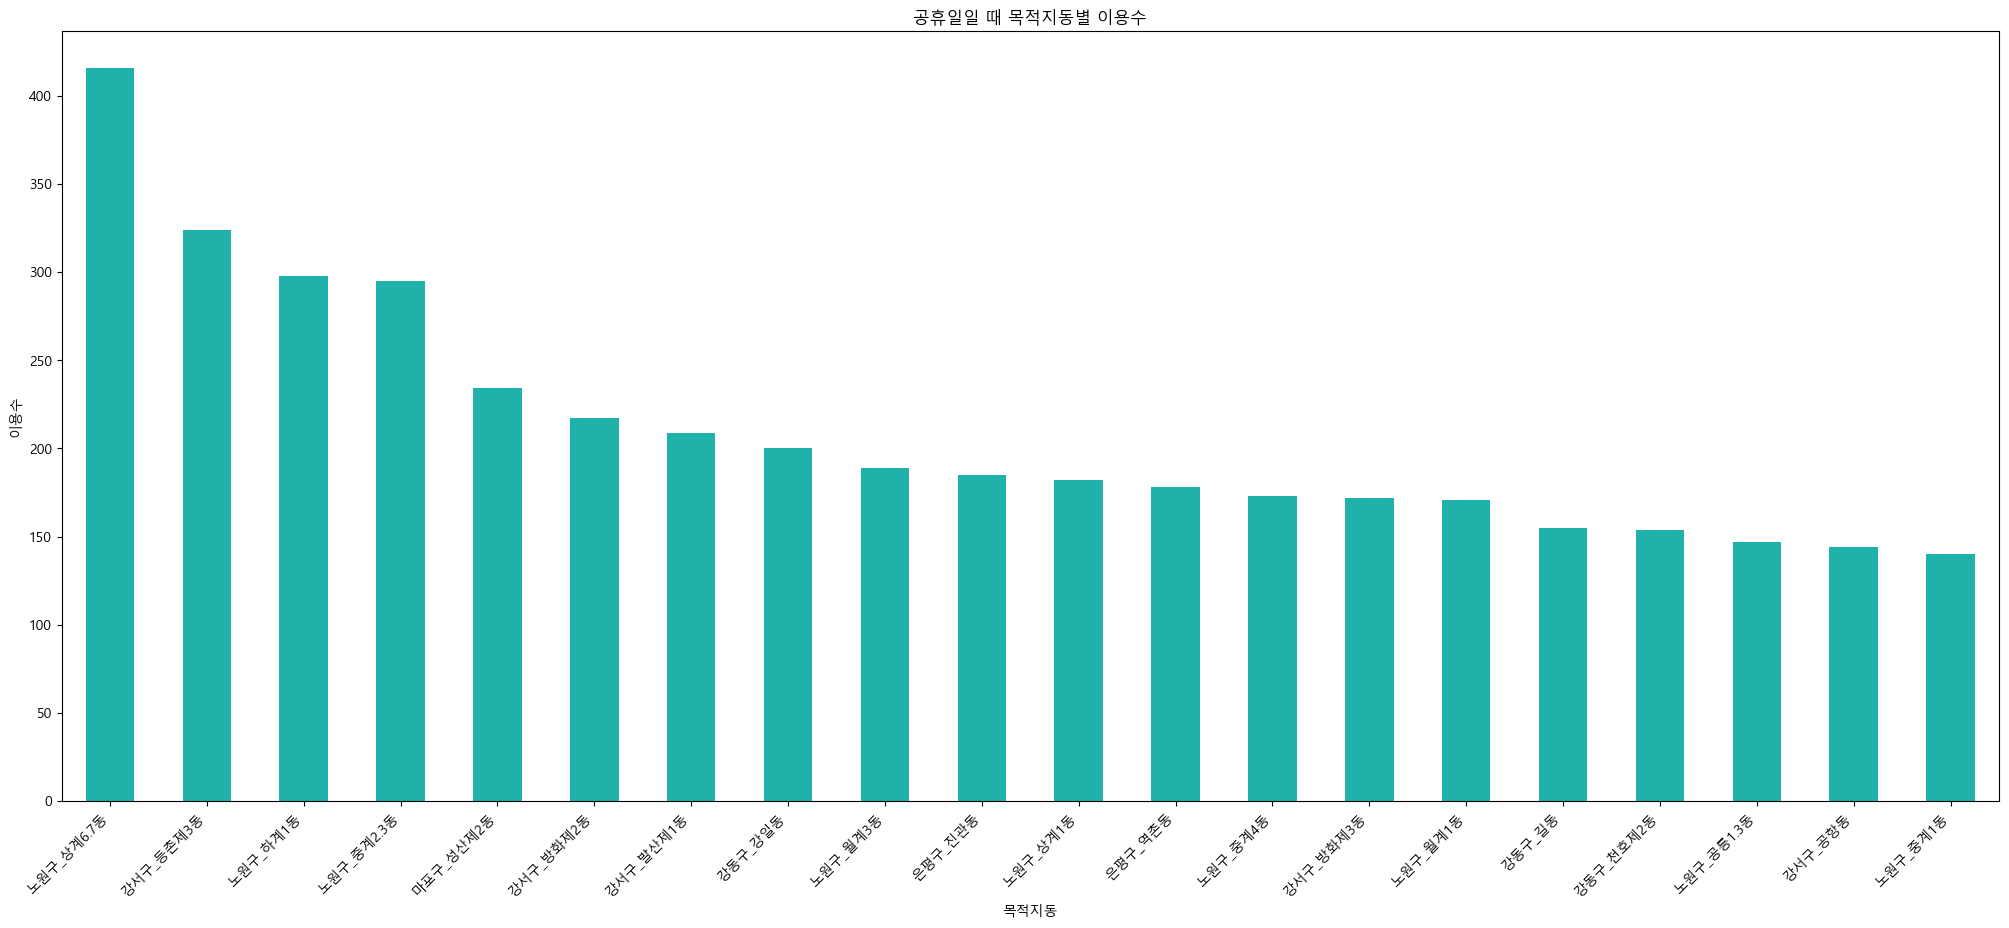

In [7]:
# 공휴일여부가 True인 데이터만 필터링
holiday_O = data[data['공휴일'] == 1]
holiday_1 = data[data['공휴일'] == 1]

# 출발지구별 이용수 시각화(상위 20개)
startdong_type_counts = holiday_O['출발지구_출발지동'].value_counts().head(20)
print(startdong_type_counts.head(5))

# 목적지구별 이용수 시각화(상위 20개)
startdong_type_counts1 = holiday_1['목적지구_목적지동'].value_counts().head(20)
print(startdong_type_counts1.head(5))

# 출발지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('공휴일일 때 출발지동별 이용수')
plt.xlabel('출발지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts1.plot(kind='bar', color='lightseagreen')
plt.title('공휴일일 때 목적지동별 이용수')
plt.xlabel('목적지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 11.6 공휴일 아닐때 출발지동, 목적지동별 이용수 시각화(상위 20개만 출력)

노원구_하계1동      67192
노원구_상계6.7동    53820
서대문구_신촌동      32210
서대문구_연희동      31506
은평구_역촌동       26418
Name: 출발지구_출발지동, dtype: int64
노원구_상계6.7동    38037
노원구_하계1동      31813
은평구_역촌동       20470
은평구_구산동       19644
마포구_성산제2동     18384
Name: 목적지구_목적지동, dtype: int64


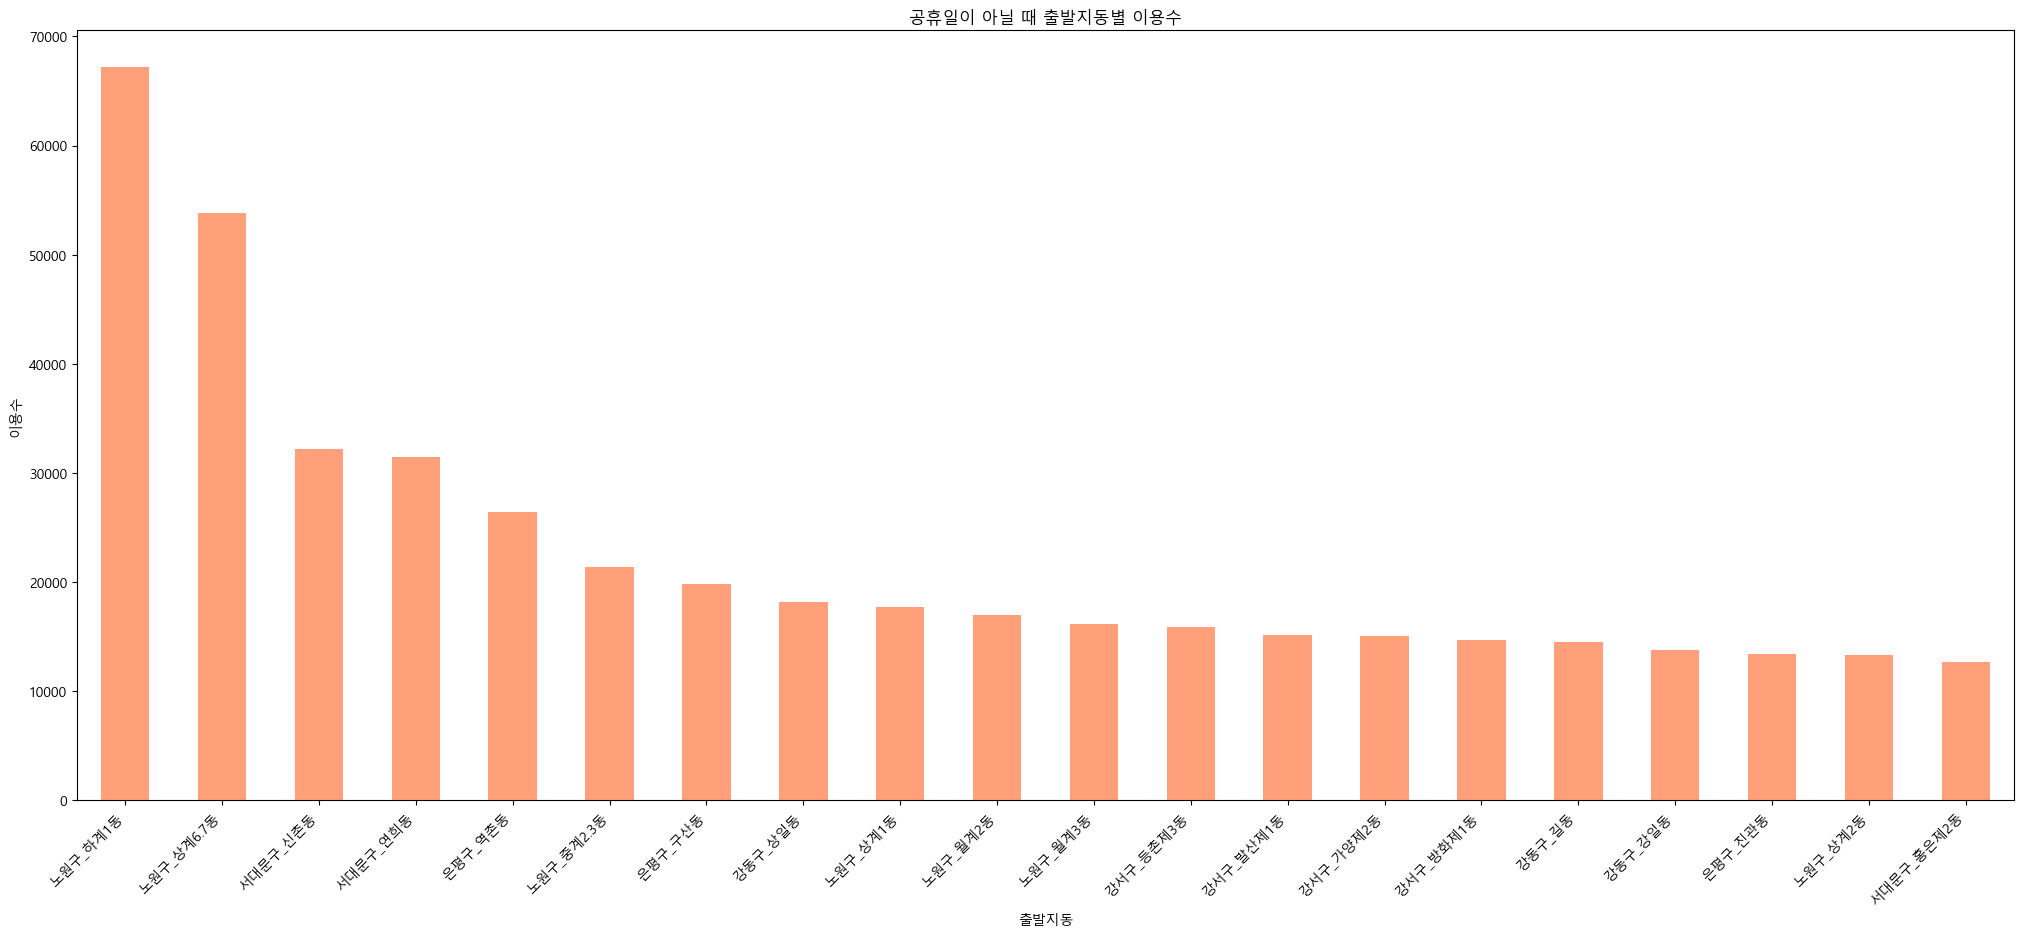

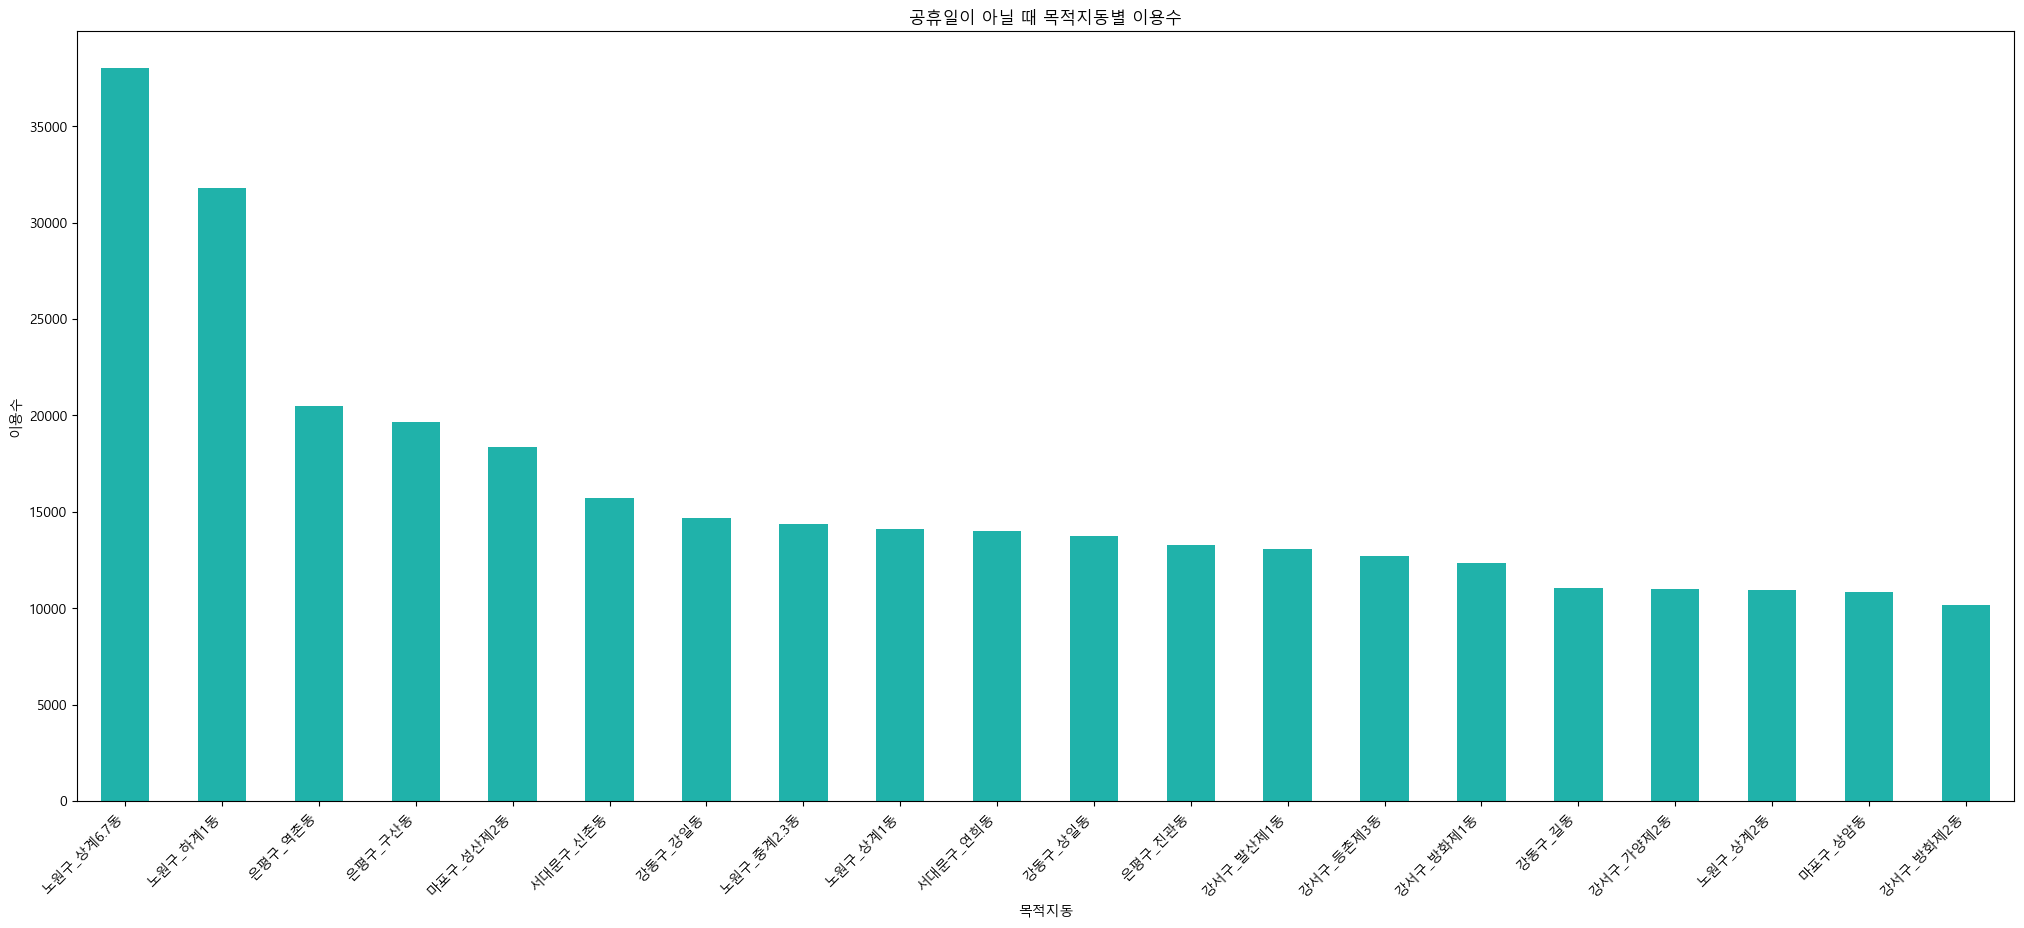

In [8]:
# 공휴일여부가 True인 데이터만 필터링
holiday_O = data[data['공휴일'] == 0]
holiday_1 = data[data['공휴일'] == 0]

# 출발지구별 이용수 시각화
startdong_type_counts = holiday_O['출발지구_출발지동'].value_counts().head(20)
print(startdong_type_counts.head(5))

# 목적지구별 이용수 시각화
startdong_type_counts1 = holiday_1['목적지구_목적지동'].value_counts().head(20)
print(startdong_type_counts1.head(5))

# 출발지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts.plot(kind='bar', color='lightsalmon')
plt.title('공휴일이 아닐 때 출발지동별 이용수')
plt.xlabel('출발지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

# 목적지구별 이용수 시각화
plt.figure(figsize=(25, 10))
startdong_type_counts1.plot(kind='bar', color='lightseagreen')
plt.title('공휴일이 아닐 때 목적지동별 이용수')
plt.xlabel('목적지동')
plt.ylabel('이용수')
plt.xticks(rotation=45, ha="right")
plt.show()

## 시간대별 평균 대기시간 시각화

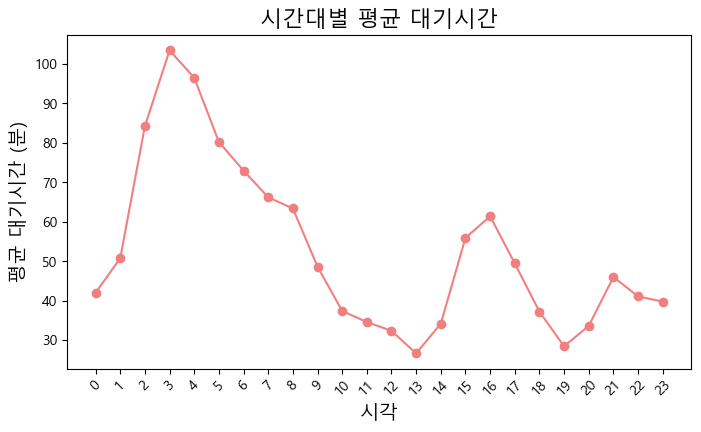

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 대기시간 데이터 준비
data['대기시간'] = pd.to_numeric(data['대기시간'], errors='coerce')  # 숫자형 변환

# 시간대별 평균 대기시간
hourly_avg_waiting = data.groupby('접수시간')['대기시간'].mean()

# 그래프 시각화 (하나의 그래프만 크기를 키워서 표시)
fig, ax = plt.subplots(figsize=(8, 5))  # 그래프 크기 키움
plt.tight_layout(pad=5)

# 시간대별 평균 대기시간 그래프 (Light Coral)
ax.plot(hourly_avg_waiting.index, hourly_avg_waiting.values, color='lightcoral', marker='o')
ax.set_title('시간대별 평균 대기시간', fontsize=16)
ax.set_xlabel('시각', fontsize=14)
ax.set_ylabel('평균 대기시간 (분)', fontsize=14)
ax.set_xticks(range(0, 24))
ax.tick_params(axis='x', rotation=45)

plt.show()

## 11.8 월, 요일, 시간대별 이용 수 시각화

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256331 entries, 0 to 256330
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   접수일시     256331 non-null  datetime64[ns]
 1   예정일시     256331 non-null  object        
 2   배차일시     256331 non-null  object        
 3   승차일시     256331 non-null  object        
 4   하차일시     256331 non-null  object        
 5   출발지구     256331 non-null  object        
 6   출발지동     256331 non-null  object        
 7   목적지구     256331 non-null  object        
 8   목적지동     256331 non-null  object        
 9   요금       256331 non-null  int64         
 10  승차거리     256331 non-null  float64       
 11  대기시간     256331 non-null  float64       
 12  공휴일      256331 non-null  int64         
 13  접수일시_월   256331 non-null  int64         
 14  접수일시_요일  256331 non-null  int64         
 15  접수일시_시각  256331 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
me

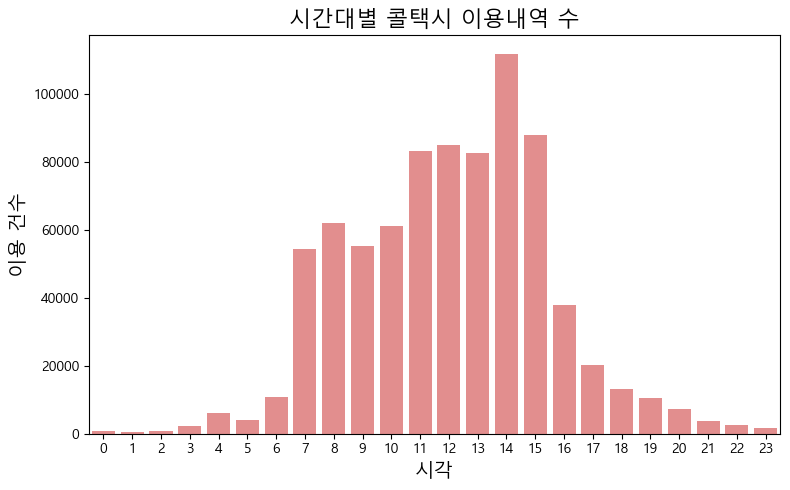

In [24]:
# 시간대별 콜택시 이용내역 수 (Light Coral)
hourly_data = data['접수시간'].value_counts().sort_index()

# 그래프 시각화 (하나의 그래프만 크기를 키워서 표시)
fig, ax = plt.subplots(figsize=(8, 5))  # 그래프 크기 키움

# 시간대별 콜택시 이용내역 수 그래프 (Light Coral)
sns.barplot(x=hourly_data.index, y=hourly_data.values, color="lightcoral", ax=ax)
ax.set_title('시간대별 콜택시 이용내역 수', fontsize=16)
ax.set_xlabel('시각', fontsize=14)
ax.set_ylabel('이용 건수', fontsize=14)

plt.tight_layout()
plt.show()


## 11.9 시간대별 평균 대기시간(모든 일자)

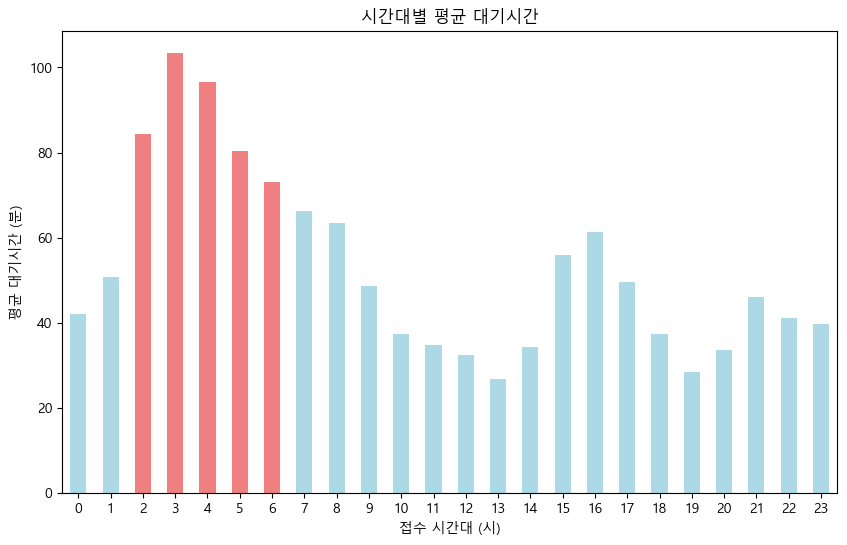

In [25]:
import matplotlib.pyplot as plt

# '접수일시_시각'을 사용하여 시간대별 '대기시간' 평균 계산
time_wait_avg = data.groupby('접수시간')['대기시간'].mean()

# 상위 5개의 시간대를 찾음
top_5_time = time_wait_avg.nlargest(5).index

# 색상 리스트 생성 (상위 5개는 lightcoral, 나머지는 lightblue)
colors = ['lightcoral' if time in top_5_time else 'lightblue' for time in time_wait_avg.index]

# 그래프 생성
plt.figure(figsize=(10, 6))
time_wait_avg.plot(kind='bar', color=colors)

# 그래프 설정
plt.title('시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()


## 11.10 시간대별 평균 대기시간(공휴일이 아닐 경우)

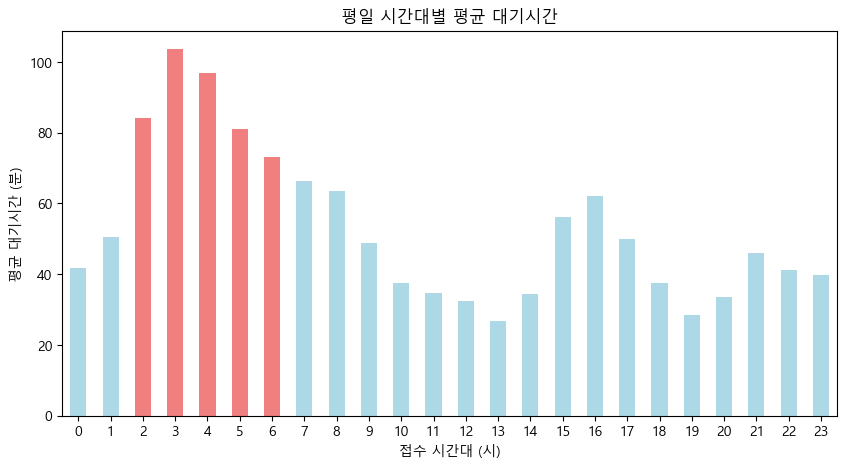

In [26]:
import matplotlib.pyplot as plt

# 공휴일 컬럼이 0이면 평일, 1이면 공휴일로 설정
data['공휴일'] = data['공휴일'].apply(lambda x: '평일' if x == 0 else '공휴일')

# 시간대 및 평일/공휴일별 대기시간 평균 계산
time_wait_avg_weekday_holiday = data.groupby(['공휴일', '접수시간'])['대기시간'].mean().unstack()

# 평일 데이터만 필터링
weekday_data = time_wait_avg_weekday_holiday.loc['평일']

# 평일 상위 5개 시간대 찾기
top_5_weekday = weekday_data.nlargest(5).index

# 평일 시간대별 평균 대기시간 그래프
plt.figure(figsize=(10, 5))
colors = ['lightcoral' if idx in top_5_weekday else 'lightblue' for idx in weekday_data.index]
weekday_data.plot(kind='bar', color=colors)

# 그래프 설정
plt.title('평일 시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()


## 11.11 시간대별 평균 대기시간(공휴일일 경우)

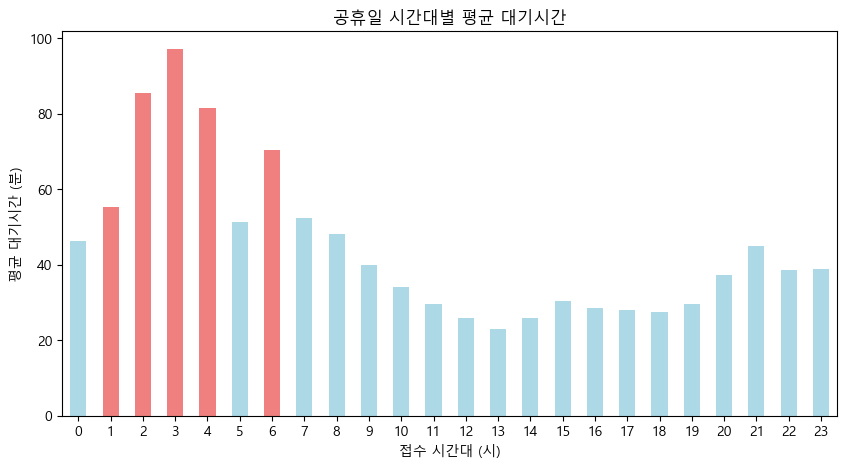

In [30]:
# 주말 데이터만 필터링
weekend_data = time_wait_avg_weekday_holiday.loc['공휴일']

# 주말 상위 5개 시간대 찾기
top_5_weekend = weekend_data.nlargest(5).index

# 주말 시간대별 평균 대기시간 그래프
plt.figure(figsize=(10, 5))
weekend_colors = ['lightcoral' if idx in top_5_weekend else 'lightblue' for idx in weekend_data.index]
weekend_data.plot(kind='bar', color=weekend_colors)
plt.title('공휴일 시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()

## 11.12 시간대별 평균 대기시간(공휴일)

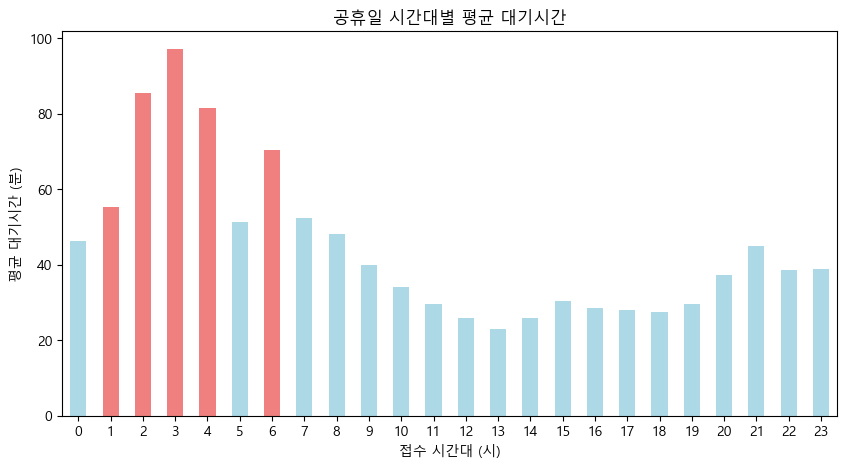

In [32]:
import matplotlib.pyplot as plt

# '공휴일' 열을 기반으로 공휴일 여부에 따라 데이터 필터링
data['공휴일여부'] = data['공휴일'].apply(lambda x: '공휴일' if x == '공휴일' else '비공휴일')

# 시간대 및 공휴일/비공휴일별 대기시간 평균 계산
time_wait_avg_holiday = data.groupby(['공휴일여부', '접수시간'])['대기시간'].mean().unstack()

# 공휴일 데이터만 필터링
holiday_data = time_wait_avg_holiday.loc['공휴일']

# 공휴일 상위 5개 시간대 찾기
top_5_holiday = holiday_data.nlargest(5).index

# 공휴일 시간대별 평균 대기시간 그래프
plt.figure(figsize=(10, 5))
holiday_colors = ['lightcoral' if idx in top_5_holiday else 'lightblue' for idx in holiday_data.index]
holiday_data.plot(kind='bar', color=holiday_colors)
plt.title('공휴일 시간대별 평균 대기시간')
plt.xlabel('접수 시간대 (시)')
plt.ylabel('평균 대기시간 (분)')
plt.xticks(rotation=0)
plt.show()## 11.11 시간대별 평균 대기시간(주말)


## 11.14 공휴일 여부에 따른 평균 대기시간 계산

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256331 entries, 0 to 256330
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   접수일시     256331 non-null  datetime64[ns]
 1   예정일시     256331 non-null  object        
 2   배차일시     256331 non-null  object        
 3   승차일시     256331 non-null  object        
 4   하차일시     256331 non-null  object        
 5   출발지구     256331 non-null  object        
 6   출발지동     256331 non-null  object        
 7   목적지구     256331 non-null  object        
 8   목적지동     256331 non-null  object        
 9   요금       256331 non-null  int64         
 10  승차거리     256331 non-null  float64       
 11  대기시간     256331 non-null  float64       
 12  공휴일      256331 non-null  int64         
 13  접수일시_월   256331 non-null  int64         
 14  접수일시_요일  256331 non-null  int64         
 15  접수일시_시각  256331 non-null  int64         
 16  평일/주말    256331 non-null  object        
 17  공휴일여부    2

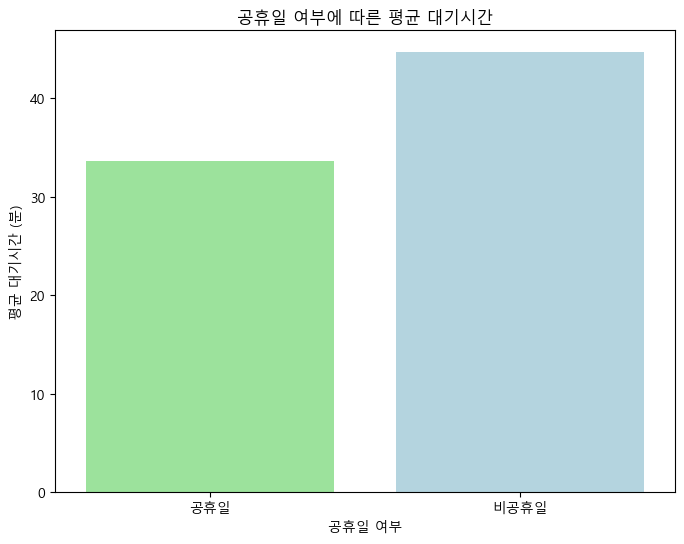

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공휴일 여부에 따른 평균 대기시간 계산
avg_waiting_time_by_holiday = data.groupby('공휴일여부')['대기시간'].mean().reset_index()

# 색상 설정 (공휴일은 lightyellow, 비공휴일은 lightblue)
colors = ['lightgreen' if x == '공휴일' else 'lightblue' for x in avg_waiting_time_by_holiday['공휴일여부']]

# 그래프
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_waiting_time_by_holiday, x='공휴일여부', y='대기시간', palette=colors)

# 그래프 설정
plt.title('공휴일 여부에 따른 평균 대기시간')
plt.xlabel('공휴일 여부')
plt.ylabel('평균 대기시간 (분)')

plt.show()
